# CSV and mapping exploration

In [0]:
pip install quakefeeds

In [0]:
pip install geopandas

     |████████████████████████████████| 931kB 9.5MB/s 
     |████████████████████████████████| 14.7MB 241kB/s 
     |████████████████████████████████| 10.9MB 40.2MB/s 


In [0]:
pip install dash

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 1.2MB 13.5MB/s 
     |████████████████████████████████| 3.4MB 30.2MB/s 
     |████████████████████████████████| 194kB 51.0MB/s 
     |████████████████████████████████| 1.8MB 51.7MB/s 
     |████████████████████████████████| 358kB 47.8MB/s 
  Created wheel for dash: filename=dash-1.12.0-cp36-none-any.whl size=73892 sha256=c6b369578030fef0dfa1511d17776d88078ca6bb047cebeb8dec26b52721adc2
  Stored in directory: /root/.cache/pip/wheels/2e/bc/dd/b4ebecb434c90eff7c5475efc10b72aad5a899c01fa87e2647
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273 sha256=35be45f22739caf077ea9157a00446803a3cc08d87d8a1a89b7c84985bf8b731
  Stored in directory: /root/.cache/pip/wheels/f7/e9/e4/5afc286be7c87461375e33152558415dfeb0c8f5af3b50e742
  Created wheel for dash-renderer: filename=dash_renderer-1.4.1-cp36-none-any.whl size=1165597 sha256=0875fe88fd714ea93b904bfc44cc04da6c0b

In [0]:
pip install timezonefinder[numba]

     |████████████████████████████████| 39.2MB 106kB/s 


In [0]:
pip install pytz

In [0]:
import geopandas as gpd
import pandas as pd

In [0]:
# # data = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson'
# data = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv'
# # df = gpd.read_file(data)
# df = pd.read_csv(data)
# crs = {'init': 'epsg:4326'}
# print(type(df))
# df.head()

In [0]:
import matplotlib.pyplot as plt
# import descartes
# from shapely.geometry import Point, Polygon

In [0]:
# world = gpd.read_file('/content/TM_WORLD_BORDERS-0.3.shp')

In [0]:
# fig, ax = plt.subplots(figsize=(30, 30))
# world.plot(ax = ax)

In [0]:
# geometry = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]
# geometry[:3]

In [0]:
# geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
# geo_df.head()

In [0]:
# fig, ax = plt.subplots(figsize = (30, 30))
# world.plot(ax=ax, alpha = 0.4, color='grey')
# plt.scatter(x = df['longitude'], y = df['latitude'], c = df['mag'], marker = 'o', label = 'mag', s=df['mag'])
# plt.legend(loc="upper right")

In [0]:
# pk.eyJ1IjoibGVjaGVtcmMiLCJhIjoiY2s4eHgxZjY4MWNneTNmcHJyaXdyeWFuaiJ9.IGpe6KgBpbnOOiKWE0VLtw

# GeoJSON with geopandas

In [0]:
#import necessary libraries
import numpy as np 
import pandas as pd
import plotly as py
import sklearn
import plotly.offline as offline
import plotly.graph_objs as go
import geopandas as gpd
import datetime
import re

In [0]:
thirty = gpd.read_file('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson')
col_list = []
for col in thirty.columns:
    col_list.append(col)

col_list

['id',
 'mag',
 'place',
 'time',
 'updated',
 'tz',
 'url',
 'detail',
 'felt',
 'cdi',
 'mmi',
 'alert',
 'status',
 'tsunami',
 'sig',
 'net',
 'code',
 'ids',
 'sources',
 'types',
 'nst',
 'dmin',
 'rms',
 'gap',
 'magType',
 'type',
 'title',
 'geometry']

In [0]:
thirty['dist_from_city'] = thirty['place'].str.split('of ', expand=True)[0]
thirty['city'] = thirty['place'].str.split('of ', expand=True)[1]
thirty['city'] = thirty['city'].str.split(', ', expand=True)[0]
thirty['country'] = thirty['place'].str.split(', ', expand=True)[1]

In [0]:
geo = thirty[['geometry', 'city', 'country']]
geo.head()

,geometry,city,country
0,POINT Z (-116.77983 33.50517 7.02000),Aguanga,CA
1,POINT Z (-122.84534 38.82133 2.34000),The Geysers,CA
2,POINT Z (-116.77367 33.67517 10.43000),Idyllwild,CA
3,POINT Z (-122.57684 38.51217 9.65000),Calistoga,CA
4,POINT Z (-117.48533 35.68417 2.64000),Searles Valley,CA


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



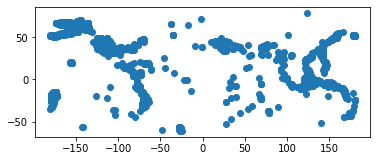

In [0]:
geo['centroid_col'] = geo['geometry'].centroid
geo = geo.set_geometry('centroid_col')
geo.plot();

In [0]:
geo.head()

,geometry,city,country,centroid_col
0,POINT Z (-116.77983 33.50517 7.02000),Aguanga,CA,POINT (-116.77983 33.50517)
1,POINT Z (-122.84534 38.82133 2.34000),The Geysers,CA,POINT (-122.84534 38.82133)
2,POINT Z (-116.77367 33.67517 10.43000),Idyllwild,CA,POINT (-116.77367 33.67517)
3,POINT Z (-122.57684 38.51217 9.65000),Calistoga,CA,POINT (-122.57684 38.51217)
4,POINT Z (-117.48533 35.68417 2.64000),Searles Valley,CA,POINT (-117.48533 35.68417)


In [0]:
geo['lat'] = [geo['geometry'][i].x for i in range(len(geo['geometry']))]
geo['long'] = [geo['geometry'][i].y for i in range(len(geo['geometry']))]
geo['depth'] = [geo['geometry'][i].z for i in range(len(geo['geometry']))]

In [0]:
geo.head(10)

,geometry,city,country,centroid_col,lat,long,depth
0,POINT Z (-116.77983 33.50517 7.02000),Aguanga,CA,POINT (-116.77983 33.50517),-116.779833,33.505167,7.02
1,POINT Z (-122.84534 38.82133 2.34000),The Geysers,CA,POINT (-122.84534 38.82133),-122.845337,38.821335,2.34
2,POINT Z (-116.77367 33.67517 10.43000),Idyllwild,CA,POINT (-116.77367 33.67517),-116.773667,33.675167,10.43
3,POINT Z (-122.57684 38.51217 9.65000),Calistoga,CA,POINT (-122.57684 38.51217),-122.576836,38.512165,9.65
4,POINT Z (-117.48533 35.68417 2.64000),Searles Valley,CA,POINT (-117.48533 35.68417),-117.485333,35.684167,2.64
5,POINT Z (-145.08970 63.44470 5.60000),Deltana,Alaska,POINT (-145.08970 63.44470),-145.089700,63.444700,5.60
6,POINT Z (-76.73290 -5.72960 24.21000),Moyobamba,Peru,POINT (-76.73290 -5.72960),-76.732900,-5.729600,24.21
7,POINT Z (-146.82770 61.35700 29.10000),Valdez,Alaska,POINT (-146.82770 61.35700),-146.827700,61.357000,29.10
8,POINT Z (-66.87710 17.89430 14.00000),Guanica,Puerto Rico,POINT (-66.87710 17.89430),-66.877100,17.894300,14.00
9,POINT Z (-116.80967 33.58883 4.83000),Anza,CA,POINT (-116.80967 33.58883),-116.809667,33.588833,4.83


In [0]:
geo.head()

,geometry,city,country,centroid_col,lat,long,depth
0,POINT Z (-116.77983 33.50517 7.02000),Aguanga,CA,POINT (-116.77983 33.50517),-116.779833,33.505167,7.02
1,POINT Z (-122.84534 38.82133 2.34000),The Geysers,CA,POINT (-122.84534 38.82133),-122.845337,38.821335,2.34
2,POINT Z (-116.77367 33.67517 10.43000),Idyllwild,CA,POINT (-116.77367 33.67517),-116.773667,33.675167,10.43
3,POINT Z (-122.57684 38.51217 9.65000),Calistoga,CA,POINT (-122.57684 38.51217),-122.576836,38.512165,9.65
4,POINT Z (-117.48533 35.68417 2.64000),Searles Valley,CA,POINT (-117.48533 35.68417),-117.485333,35.684167,2.64


In [0]:
help(geo['geometry'][0].centroid)

Help on Point in module shapely.geometry.point object:

class Point(shapely.geometry.base.BaseGeometry)
 |  A zero dimensional feature
 |  
 |  A point has zero length and zero area.
 |  
 |  Attributes
 |  ----------
 |  x, y, z : float
 |      Coordinate values
 |  
 |  Example
 |  -------
 |    >>> p = Point(1.0, -1.0)
 |    >>> print(p)
 |    POINT (1.0000000000000000 -1.0000000000000000)
 |    >>> p.y
 |    -1.0
 |    >>> p.x
 |    1.0
 |  
 |  Method resolution order:
 |      Point
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args)
 |      Parameters
 |      ----------
 |      There are 2 cases:
 |      
 |      1) 1 parameter: this must satisfy the numpy array protocol.
 |      2) 2 or more parameters: x, y, z : float
 |          Easting, northing, and elevation.
 |  
 |  array_interface(self)
 |      Provide the Numpy array protocol.
 |  
 |  svg(self, scale_factor=1.0, fill_color=None)
 |      Return

# WRANGLING FUNCTION

In [0]:
# Important imports

import plotly as py
import sklearn
import plotly.offline as offline
import plotly.graph_objs as go
import geopandas as gpd
import datetime
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timezonefinder import TimezoneFinder
from datetime import datetime, timedelta
from pytz import timezone
import pytz

In [0]:
thirty = gpd.read_file('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson')

In [0]:
def wrangle(df):
    """ Wrangles the data """ 

    geo = df.copy()

    # Parse the city and country/state
    geo['dist_from_city'] = geo['place'].str.split('of ', expand=True)[0]
    geo['city'] = geo['place'].str.split('of ', expand=True)[1]
    geo['city'] = geo['city'].str.split(', ', expand=True)[0]
    geo['country_state'] = geo['place'].str.split(', ', expand=True)[1]

    # Accounting for values without distances or cities in raw data
    geo['city'].fillna(geo['place'], inplace=True)
    geo['country_state'].fillna(geo['place'], inplace=True)

    # Getting value for any missing timezone ('tz') entries
    tf = TimezoneFinder()
    lat, lng = geo.loc[geo['tz'].isna(), 'lat'].item(), geo.loc[geo['tz'].isna(), 'long'].item()
    tf.timezone_at(lng=lng, lat=lat)
    
    # Parse the latitude, longitude, and the depth for each seismic event
    geo['long'] = [geo['geometry'][i].x for i in range(len(geo['geometry']))]
    geo['lat'] = [geo['geometry'][i].y for i in range(len(geo['geometry']))]
    geo['longlat'] = list(zip(geo['long'], geo['lat']))
    geo['depth'] = [geo['geometry'][i].z for i in range(len(geo['geometry']))]

    # Convert time columns to datetime format
    geo['time_dt'] = [datetime.datetime.fromtimestamp(
        i / 1000) for i in geo['time']]
    geo['updated_dt'] = [datetime.datetime.fromtimestamp(
        i / 1000) for i in geo['updated']]

    # Return wrangled dataframe 
    return geo

In [0]:
thirty = wrangle(thirty)

In [0]:
thirty.isna().sum()

In [0]:
thirty[thirty['tz'].isna()]

,id,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,alert,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,type,title,geometry,dist_from_city,city,country_state,long,lat,longlat,depth,time_dt,updated_dt
9153,us60009anw,4.6,Scotia Sea,1587000822693,1587938107040,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,326,us,60009anw,",us60009anw,",",us,",",origin,phase-data,",NaN,5.502,0.64,80.0,mb,earthquake,M 4.6 - Scotia Sea,POINT Z (-47.48300 -60.25020 10.00000),Scotia Sea,Scotia Sea,Scotia Sea,-47.483,-60.2502,"(-47.483, -60.2502)",10.0,2020-04-16 01:33:42.693,2020-04-26 21:55:07.040


### Figuring out timezone issues

In [0]:
thirty['tz']

In [0]:
tf = TimezoneFinder()
latitude, longitude = thirty.loc[thirty['tz'].isna(), 'lat'].item(), thirty.loc[thirty['tz'].isna(), 'long'].item()
tf.timezone_at(lng=longitude, lat=latitude)

'America/Argentina/Ushuaia'

In [0]:
latitude, longitude = thirty.loc[thirty['tz'].isna(), 'lat'].item(), thirty.loc[thirty['tz'].isna(), 'long'].item()
print(latitude, longitude)

-60.2502 -47.483


In [0]:
thirty.loc[thirty['tz'].isna(), 'lat'].item()

-60.2502

In [0]:
thirty.loc[thirty['tz'].isna(), 'time_dt'].item()

Timestamp('2020-04-16 01:33:42.693000')

In [0]:
tf = TimezoneFinder()
latitude, longitude = thirty.loc[thirty['tz'].isna(), 'lat'].item(), thirty.loc[thirty['tz'].isna(), 'long'].item()
timezone_val = tf.timezone_at(lng=longitude, lat=latitude)
print(timezone_val)



America/Argentina/Ushuaia


TypeError: ignored

In [0]:
tz = timezone('America/Argentina/Ushuaia')
value = tz.utcoffset(thirty.loc[thirty['tz'].isna(), 'time_dt'].item(), is_dst=True)
value.days, value.seconds

TypeError: ignored

In [0]:
tz.dst(thirty.loc[thirty['tz'].isna(), 'time_dt'].item(), is_dst=True)

datetime.timedelta(0)

# Geocoder function

In [0]:
pip install geocoder

In [0]:
pip install geopy

In [0]:
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('South Salt Lake, United States')

print((location.latitude, location.longitude))
print(location.raw)

# Data Exploration

In [0]:
df = wrangle(thirty)

In [0]:
nulls = df.isnull().sum()
nulls[nulls > 0]

In [0]:
len(df[df['nst'].isna()])

In [0]:
df['nst'].dtypes

In [0]:
df.columns

In [0]:
df.loc[df['nst'].isna(), 'nst'] = df.groupby('country_state')['nst'].transform('mean')

In [0]:
df.head()

In [0]:
df.isna().sum()

In [0]:
df.loc[df['country_state'].isna()]

### FancyImpute

In [0]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

In [0]:
# df is my data frame with the missings. I keep only floats
thirty_numeric = np.array(thirty['nst']).reshape(-1, 1)

# I now run fancyimpute KNN, 
# it returns a np.array which I store as a pandas dataframe
thirty_filled = pd.DataFrame(KNN(3).fit_transform(thirty_numeric))

# Leaflet Map

In [0]:
len(thirty)

In [0]:
import folium

In [0]:
m = folium.Map(
    location=[40.387878 , -111.849167],
    tiles='Stamen Toner',
    zoom_start=13
    )

# tooltip = 'Click me!'

# for row in thirty['longlat']:
#         folium.Marker([row[1], row[0]], tooltip=tooltip).add_to(m)

m

In [0]:
thirty['longlat']